### Problem Statement
#### For the given dataset, perform the tasks below and write your observations
    a.	“https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data”
    b.	Perform EDA
    c.	Build a decision tree classifier
    d.	Optimize the decision tree parameters to increase accuracy
    e.	Evaluate performance and explain the metrics


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import Series

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
import warnings as wrn
wrn.filterwarnings('ignore')


#### Importing Dataset 
a. balance-scale.data

In [111]:
# Given data file converted to .csv file
# and then read using python
data = pd.read_csv("balance-scale.csv")
data.head()

Class Name  Left-Weight  Left-Distance  Right-Weight  Right-Distance
0          B            1              1             1               1
1          R            1              1             1               2
2          R            1              1             1               3
3          R            1              1             1               4
4          R            1              1             1               5

#### b. Perform EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
Class Name        625 non-null object
Left-Weight       625 non-null int64
Left-Distance     625 non-null int64
Right-Weight      625 non-null int64
Right-Distance    625 non-null int64
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [7]:
data.columns

Index(['Class Name', 'Left-Weight', 'Left-Distance', 'Right-Weight',
       'Right-Distance'],
      dtype='object')

In [8]:
data.describe()

Left-Weight  Left-Distance  Right-Weight  Right-Distance
count   625.000000     625.000000    625.000000      625.000000
mean      3.000000       3.000000      3.000000        3.000000
std       1.415346       1.415346      1.415346        1.415346
min       1.000000       1.000000      1.000000        1.000000
25%       2.000000       2.000000      2.000000        2.000000
50%       3.000000       3.000000      3.000000        3.000000
75%       4.000000       4.000000      4.000000        4.000000
max       5.000000       5.000000      5.000000        5.000000

In [11]:
data['Class Name'].unique()

array(['B', 'R', 'L'], dtype=object)

In [12]:
#Import labelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
#Converting string labels into numbers.
Class=le.fit_transform(data['Class Name'])
print(Class)

[0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 0 2 1 0 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 1 1 1 0 1 1 2 2 2 1
 2 2 2 2 1 2 2 2 2 0 2 2 2 2 1 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 0 2 1 0 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 0 2 2
 1 0 2 2 2 1 2 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 0 2 1 1 2 2 2 1 0 2 2 2 1 2
 2 2 2 1 1 1 1 1 1 1 1 1 0 1 1 1 2 2 1 1 2 2 2 1 0 2 2 2 1 1 0 2 2 1 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 0 2 2 1 0 2 2 2 1 2 2 2 2 1
 2 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1 0 2 2 1 1 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 2 1 1 0 2 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 2
 1 1 0 2 2 1 1 1 0 2 1 0 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 0 2 1 1 2 2 2 1 0 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 1 0 2
 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 2 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [15]:
data['Class']=Class
data.head()

Class Name  Left-Weight  Left-Distance  Right-Weight  Right-Distance  Class
0          B            1              1             1               1      0
1          R            1              1             1               2      2
2          R            1              1             1               3      2
3          R            1              1             1               4      2
4          R            1              1             1               5      2

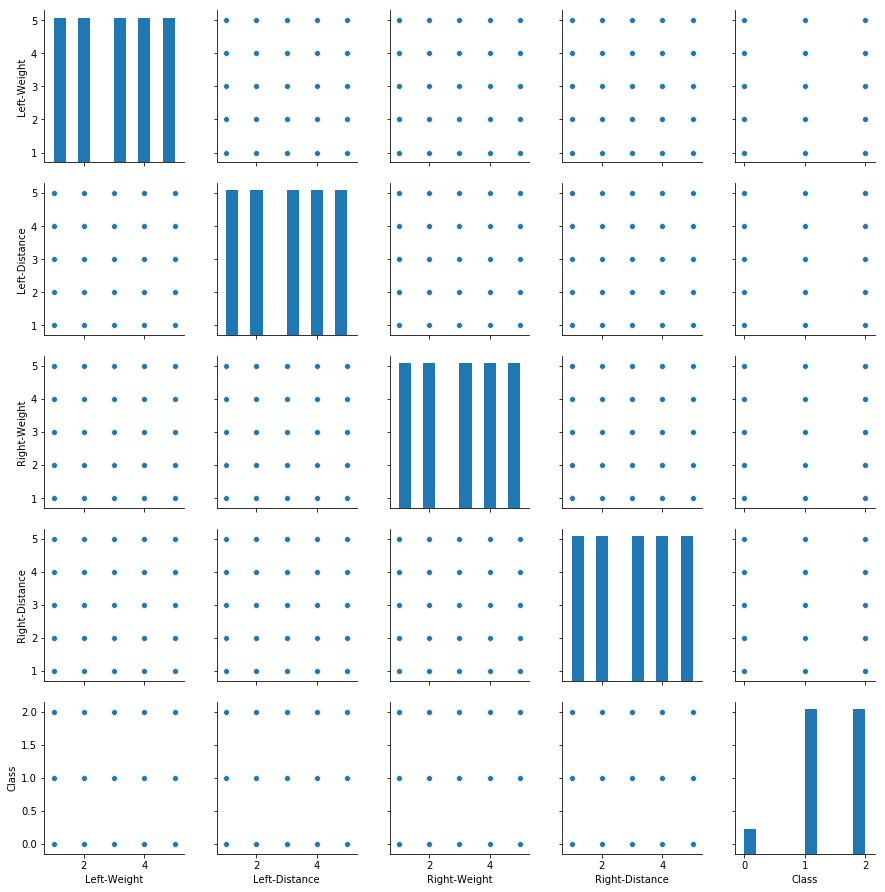

In [16]:
sns.pairplot(data)

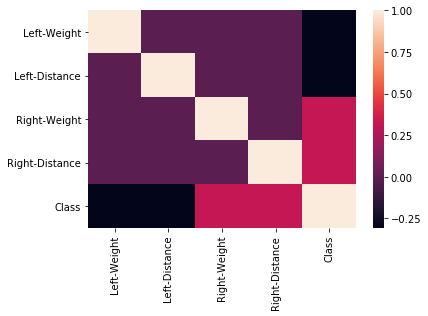

In [22]:
#Heatmap

sns.heatmap(data.corr())
plt.show()


In [24]:
X = data.drop(['Class Name','Class'], axis = 1)
y = data.Class


In [73]:
### Model building - Split dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=30, random_state=3)

### Building Decision Tree Classifier

In [74]:
# Using GINI index which is the default criterion of this classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [75]:
y_pred = clf.predict(X_test)

In [96]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8666666666666667


In [98]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[ 0  2  0]
 [ 1 11  0]
 [ 1  0 15]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.85      0.92      0.88        12
           2       1.00      0.94      0.97        16

   micro avg       0.87      0.87      0.87        30
   macro avg       0.62      0.62      0.62        30
weighted avg       0.87      0.87      0.87        30



### d.    Optimize the decision tree parameters to increase accuracy

In [99]:
# when criterion is entropy
clf2 = DecisionTreeClassifier(max_depth=2,random_state=0)

clf2 = clf2.fit(X_train,y_train)

y_pred2 = clf2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))

Accuracy: 0.7666666666666667
[[ 0  2  0]
 [ 0  9  3]
 [ 0  2 14]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.69      0.75      0.72        12
           2       0.82      0.88      0.85        16

   micro avg       0.77      0.77      0.77        30
   macro avg       0.51      0.54      0.52        30
weighted avg       0.72      0.77      0.74        30



In [100]:
# when criterion is entropy
clf2 = DecisionTreeClassifier(max_depth=3,random_state=0)

clf2 = clf2.fit(X_train,y_train)

y_pred2 = clf2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))

Accuracy: 0.8666666666666667
[[ 0  2  0]
 [ 0 11  1]
 [ 0  1 15]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.79      0.92      0.85        12
           2       0.94      0.94      0.94        16

   micro avg       0.87      0.87      0.87        30
   macro avg       0.57      0.62      0.59        30
weighted avg       0.81      0.87      0.84        30



In [101]:
# when criterion is entropy
clf2 = DecisionTreeClassifier(max_depth=1,random_state=0)

clf2 = clf2.fit(X_train,y_train)

y_pred2 = clf2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))

Accuracy: 0.5666666666666667
[[ 0  2  0]
 [ 0  7  5]
 [ 0  6 10]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.47      0.58      0.52        12
           2       0.67      0.62      0.65        16

   micro avg       0.57      0.57      0.57        30
   macro avg       0.38      0.40      0.39        30
weighted avg       0.54      0.57      0.55        30



In [102]:
# when criterion is entropy
clf2 = DecisionTreeClassifier(criterion="entropy",random_state=0)

clf2 = clf2.fit(X_train,y_train)

y_pred2 = clf2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))

Accuracy: 0.8666666666666667
[[ 0  2  0]
 [ 1 11  0]
 [ 1  0 15]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.85      0.92      0.88        12
           2       1.00      0.94      0.97        16

   micro avg       0.87      0.87      0.87        30
   macro avg       0.62      0.62      0.62        30
weighted avg       0.87      0.87      0.87        30



In [103]:
# when criterion is entropy
clf2 = DecisionTreeClassifier(criterion="entropy",max_depth=1,random_state=0)

clf2 = clf2.fit(X_train,y_train)

y_pred2 = clf2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))

Accuracy: 0.5666666666666667
[[ 0  2  0]
 [ 0  7  5]
 [ 0  6 10]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.47      0.58      0.52        12
           2       0.67      0.62      0.65        16

   micro avg       0.57      0.57      0.57        30
   macro avg       0.38      0.40      0.39        30
weighted avg       0.54      0.57      0.55        30



In [104]:
# when criterion is entropy
clf2 = DecisionTreeClassifier(criterion="entropy",max_depth=2,random_state=0)

clf2 = clf2.fit(X_train,y_train)

y_pred2 = clf2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))

Accuracy: 0.7333333333333333
[[ 0  2  0]
 [ 0  6  6]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      0.50      0.60        12
           2       0.73      1.00      0.84        16

   micro avg       0.73      0.73      0.73        30
   macro avg       0.49      0.50      0.48        30
weighted avg       0.69      0.73      0.69        30



In [105]:
# when criterion is entropy
clf2 = DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=0)

clf2 = clf2.fit(X_train,y_train)

y_pred2 = clf2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))

Accuracy: 0.7666666666666667
[[ 0  2  0]
 [ 0  8  4]
 [ 0  1 15]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.73      0.67      0.70        12
           2       0.79      0.94      0.86        16

   micro avg       0.77      0.77      0.77        30
   macro avg       0.51      0.53      0.52        30
weighted avg       0.71      0.77      0.74        30



In [106]:
# when criterion is entropy
clf2 = DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=0)

clf2 = clf2.fit(X_train,y_train)

y_pred2 = clf2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))

Accuracy: 0.8
[[ 0  1  1]
 [ 0 10  2]
 [ 1  1 14]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.83      0.83      0.83        12
           2       0.82      0.88      0.85        16

   micro avg       0.80      0.80      0.80        30
   macro avg       0.55      0.57      0.56        30
weighted avg       0.77      0.80      0.79        30



In [107]:
# when criterion is entropy
clf2 = DecisionTreeClassifier(criterion="entropy",max_depth=10,random_state=0)

clf2 = clf2.fit(X_train,y_train)

y_pred2 = clf2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))

Accuracy: 0.8333333333333334
[[ 0  1  1]
 [ 1 10  1]
 [ 1  0 15]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.91      0.83      0.87        12
           2       0.88      0.94      0.91        16

   micro avg       0.83      0.83      0.83        30
   macro avg       0.60      0.59      0.59        30
weighted avg       0.83      0.83      0.83        30



In [108]:
# when criterion is entropy
clf2 = DecisionTreeClassifier(criterion="entropy",max_depth=11,random_state=0)

clf2 = clf2.fit(X_train,y_train)

y_pred2 = clf2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))

Accuracy: 0.8666666666666667
[[ 0  2  0]
 [ 1 11  0]
 [ 1  0 15]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.85      0.92      0.88        12
           2       1.00      0.94      0.97        16

   micro avg       0.87      0.87      0.87        30
   macro avg       0.62      0.62      0.62        30
weighted avg       0.87      0.87      0.87        30



In [109]:
# when criterion is entropy
clf2 = DecisionTreeClassifier(criterion="entropy",max_depth=50,random_state=0)

clf2 = clf2.fit(X_train,y_train)

y_pred2 = clf2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))

Accuracy: 0.8666666666666667
[[ 0  2  0]
 [ 1 11  0]
 [ 1  0 15]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.85      0.92      0.88        12
           2       1.00      0.94      0.97        16

   micro avg       0.87      0.87      0.87        30
   macro avg       0.62      0.62      0.62        30
weighted avg       0.87      0.87      0.87        30



### Inference
   * It is found that the irrespective of criterion, the decision tree provides an accuracy of 86.667% provided the max_depth is greater than 10.
   
   * The classification accuracy is better and hence DecisionTree would be a better model for this dataset.